<a href="https://colab.research.google.com/github/RJbalikian/SPRIT-HVSR/blob/main/SPRIT_EXAMPLE_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SpRIT HVSR Data Processing Examples

> Google Colab is a relatively simple way to run python packages without having to install and set up python locally on your system. It is not required to run SpRIT, which can run just about any system that can run python.

If you are using Google colab, you can upload this notebook, or copy and paste the content of the code cells.

The sprit package can be used in jupyter notebooks to effectively run data. However, if you are using Google Colab, all of the data is saved on the 'virtual' google computer you are using, so you will need to make sure to download or otherwise save any data you want to keep whenever using Google Colab.

By default, Google Colab has python and most of the python dependencies already installed. However, it does not have the main seismic package that sprit uses in the background (obspy) installed. So, when you tell Google colab to install sprit, it will also install obspy and any other dependencies it does not already have installed. You must do this before running any subsequent cells. This only needs to be done once per Google Colab session.

The first thing we do is install sprit using the `!pip install sprit --upgrade` command (the exclamation point at the start indicates that this is a terminal command, and the --upgrade flag ensures you have the most recent version). You can also use `uv`, which is a more sophisticated package manager than pip. Below is an example of how you would do that with `uv` in a jupyter notebook.

The exclamation points (`!`) tell the jupyter notebook to run a terminal command and not a python command.

In [ ]:
# If using Google colab, it is better to use uv to install sprit so you do not get a kernel error.
!pip install uv
!uv pip install sprit --upgrade

# Basic processing using sample data

Let' s practice the very basics of processing data in sprit using the sample data. Run the following cell (it takes about 8 or 9 seconds usually)

In [ ]:
import sprit
hvsrData = sprit.run("sample2")

# Verbose outputs

To see better what is going on "under the hood", you can add verbose outputs that will print the inputs and outputs along the way.

In [ ]:
import sprit
hvsrData = sprit.run("sample", verbose=True)

# Adding metadata to your data

HVSR measurements will involve not just seismic data, but also metadata like geospatial coordinates, elevation, site name, project name, etc. (this is in addition to instrument response metadata that may be needed to remove instrument response from your seismic data). If you are planning to post-process the data to create depth/elevation curves or HVSR transects, it is recommended to include coordinates and elevations so it is included in the .hvsr file or the `HVSRData` object you can use for post-processing.

This is relatively simple when you have a single seismic file for your site containing data from all three components (this includes data acquired using the [Raspberry Shake HVSR script](https://github.com/RJbalikian/SPRIT-HVSR/tree/main/sprit/resources/hvsrscripts) and data from supported Tromino instruments). When the data is formatted this way, the network, station, channels, location, acquisition date, starttime, and endtime will all be read from the data for you. If the data is in a more "raw" format, you may have to specify some of this yourself.

See the example below for processing this kind of file (we will use a sample file that is structured in this way).

> Note: you can find the EPSG codes for various coordinate systems at [esgp.io](https://epsg.io/). This can be entered as an integer or a string for the value of the `input_crs` parameter (and/or the `output_crs` parameter).

In [ ]:
import sprit
hvsrData = sprit.run(input_data='sample3', # This would be the filepath to your data, or an obspy Stream object with the 3-component data
                     project='Example Project', # This could be a project name, county, or any other way you organize your data
                     site="Single HVSR Site 1", #
                     xcoord=-88.20014, # longitude in WGS84 (the default). If you use another coordinate system, specify input_crs=6345 (6345 is an EPSG code for UTM Zone 16)
                     ycoord=39.6462, # latitude of measurement
                     elevation=207.31, # This is surface elevation in meters. if you use feet, you should also specify, elev_unit='ft' as a parameter
                     )

# Report formats

It may be helpful to see your data in various formats. Up until now, we have only generated a print report. However, plots and csv files may also be useful as outputs, and the data itself may be useful to save and use for later. For this, we will need to specify what kinds of reports to output and where to output them.

For the report_format parameter, we will pass a list of formats. It will generate each of those included in the list ('print', 'plot', and 'csv' are currently the only supported formats). Specifying True for the export_path parameter tells sprit to first try to save the data in the same directory as the input data. Since this is sample data, we do not want to save data in the package itself, so in this case, it will then try to save data in the current working directory. If that is also in a place where it cannot or should not save, it will then save to the home directory.

In Google colab, it will save to the main directory "/content".

In addition to saving the reports, whenever export_path is designated (either as True or as a filepath), it will also save a "pickled" version of your data object itself as a .hvsr file.

After running the cell below, you should have a png plot, a csv output of your data and whether it passed the tests, and a .hvsr file which is a copy of the hvsrData variable in a file format.

In [ ]:
import sprit
hvsrData = sprit.run("sample", report_format=['print', 'plot', 'csv'], export_path=True)

# Jupyter GUI

> NOTE: Google Colab blocks "third-party" widgets, so this will likely not work (at least with plot visualizations) in Google Colab

Open notebook in playground mode first, then run the next cells (File > Open in playground mode)

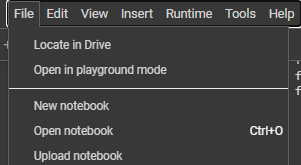

In [ ]:
import sprit
from google.colab import output
output.disable_custom_widget_manager()
sprit.gui('nb')

# Command line interface: just so you know!

Jupyter notebooks can also run terminal commands. To do this, preface your command with ! (there are also ["magic" text](https://ipython.readthedocs.io/en/stable/interactive/magics.html) commands that can be specified).

For us, we can run the command line of sprit as well from Google Colab notebooks. Here is an example of the same output as the above command, only carried out using command line. (note that there are no spaces between the list of report formats).

We are technically accessing another computer when using Google Colab, and that computer technically does not have a display, so the sprit graphical user interface (GUI) cannot be accessed through Google colab.

In [ ]:
!sprit "sample2" --report_format 'print','plot','csv' --export_path True

# Batch processing

Data can be processed in batch using sprit. Let's practice this with the six sample datasets provided. Setting verbose=True will allow us to see the progress as well as a printed version of the input csv file. Note that some of the inputs have been left blank in the input csv file. Default values are used in this instance. This usually takes about 45 seconds to process.

In [ ]:
import sprit
hvsrBatch = sprit.run("sample", source='batch', verbose=True)